In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

# Classification Problem With Auto Sklearn

In [8]:
from sklearn.datasets import load_iris
import autosklearn.classification as classifier
from sklearn.model_selection import train_test_split

In [9]:
iris = load_iris()
iris.data[0:5], iris.target

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    train_size=0.75, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [11]:
automl = classifier.AutoSklearnClassifier(time_left_for_this_task=120, per_run_time_limit=30)
automl.fit(X_train, y_train) 

[WARNING] [2020-10-20 16:56:02,915:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-10-20 16:56:03,575:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-10-20 16:56:10,429:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-10-20 16:56:17,696:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-10-20 16:56:18,650:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2020-10-20 16:56:19,535:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnClassifier(dask_client=None,
                      delete_output_folder_after_terminate=True,
                      delete_tmp_folder_after_terminate=True,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=1024, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=None, include_preprocessors=None,
                      initial_configurations_via_metalearning=25,
                      logging_config=None, max_models_on_disc=50,
                      metadata_directory=None, metric=None,
                      ml_memory_limit=3072, n_jobs=None, output_folder=None,
                      per_run_time_limit=30, resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      smac_scenario_args=None, time_left_for_this_task=120,
  

In [12]:
print(automl.score(X_train, y_train))
print(automl.score(X_test, y_test))

0.9821428571428571
0.9210526315789473


In [14]:
predictions = automl.predict(X_test)

In [15]:
import sklearn.metrics
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.9210526315789473


In [16]:
print(sklearn.metrics.confusion_matrix(y_test, predictions))

[[ 9  0  0]
 [ 0 12  0]
 [ 0  3 14]]


In [17]:
import seaborn as sn
import matplotlib.pyplot as plt

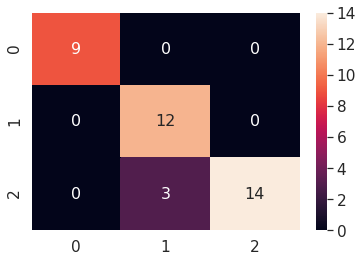

In [18]:

sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predictions)), annot=True, annot_kws={"size": 16}, fmt='')
plt.show()

# Regression Problem With Auto *Sklearn*

In [22]:
import autosklearn.regression as regressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [23]:
bostaon = load_boston()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(bostaon.data, bostaon.target,
                                                    train_size=0.75, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [25]:
automl_regress = regressor.AutoSklearnRegressor(time_left_for_this_task=120, per_run_time_limit=30)
automl_regress.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnRegressor(dask_client=None,
                     delete_output_folder_after_terminate=True,
                     delete_tmp_folder_after_terminate=True,
                     disable_evaluator_output=False, ensemble_memory_limit=1024,
                     ensemble_nbest=50, ensemble_size=50,
                     exclude_estimators=None, exclude_preprocessors=None,
                     get_smac_object_callback=None, include_estimators=None,
                     include_preprocessors=None,
                     initial_configurations_via_metalearning=25,
                     logging_config=None, max_models_on_disc=50,
                     metadata_directory=None, metric=None, ml_memory_limit=3072,
                     n_jobs=None, output_folder=None, per_run_time_limit=30,
                     resampling_strategy='holdout',
                     resampling_strategy_arguments=None, seed=1,
                     smac_scenario_args=None, time_left_for_this_task=120,
                 

In [26]:
from math import sqrt
from sklearn.metrics import mean_squared_error,r2_score
y_pred = automl_regress.predict(X_test)

rms_lr = sqrt(mean_squared_error(y_test, y_pred))
print("The Rmse value ",rms_lr)

r2_score =  r2_score(y_test, y_pred)
print("r2 core ",r2_score)

The Rmse value  3.4015480897686223
r2 core  0.8695646569536987
